In [3]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
DataDetailsFolder = '/home/sheffieldlab/Desktop/NoReward/Scripts/AnimalDetails/'
sys.path.append(DataDetailsFolder)
import DataDetails
from RewardCell_Analysis import Combinedpfs as cp

## Look at combined COM scatter to check if there are any reward cells

In [9]:
CombinedFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ExpAnimals/PlaceCellResults_All/'
ParentDataFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ExpAnimals/'
donotuse = []
task_dict = {'Task1':'1 Fam Rew', 'Task2':'2 No Rew', 'Task3':'3 Fam Rew', 'Task4':'4 Nov Rew'}

In [5]:
x = cp(CombinedFolder, ParentDataFolder, task_dict, norewardtask=['Task2'], donotuseanimal=[])

NR6_placecellparams_df.csv
NR21_placecellparams_df.csv
NR14_placecellparams_df.csv
CFC19_placecellparams_df.csv
CFC17_placecellparams_df.csv
CFC4_placecellparams_df.csv
NR24_placecellparams_df.csv
NR23_placecellparams_df.csv
CFC16_placecellparams_df.csv


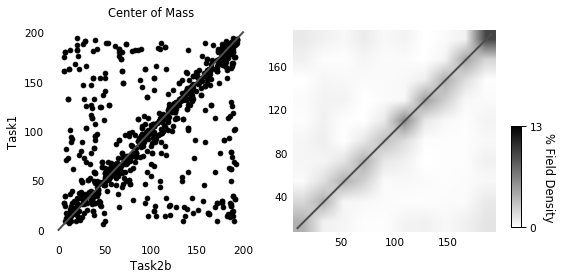

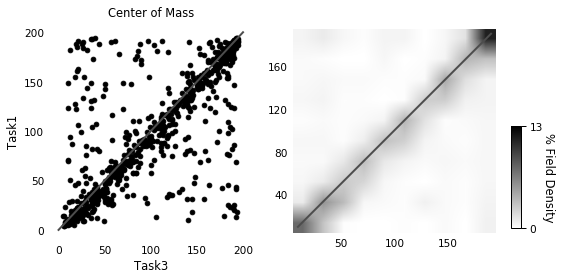

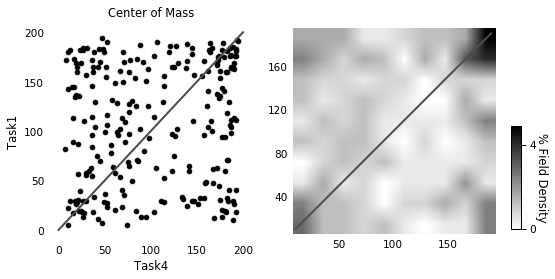

In [6]:
x.get_com_allanimal(taskA='Task1', taskB='Task2b', vmax=13)
x.get_com_allanimal(taskA='Task1', taskB='Task3', vmax=13)
x.get_com_allanimal(taskA='Task1', taskB='Task4')

## Overrepresentation of reward?

### Plot place cells around reward

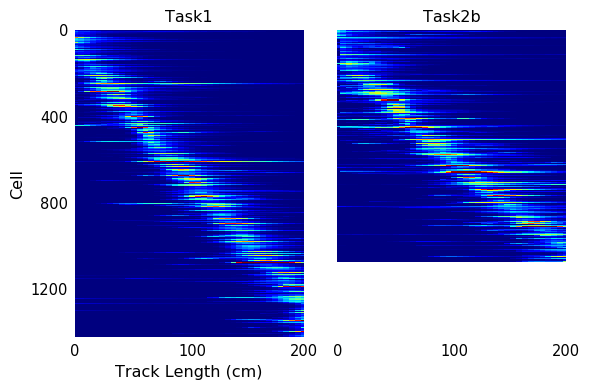

In [7]:
p = x.plot_all_placefields(tasks_to_plot=['Task1', 'Task2b'])

### Plot histogram of COM

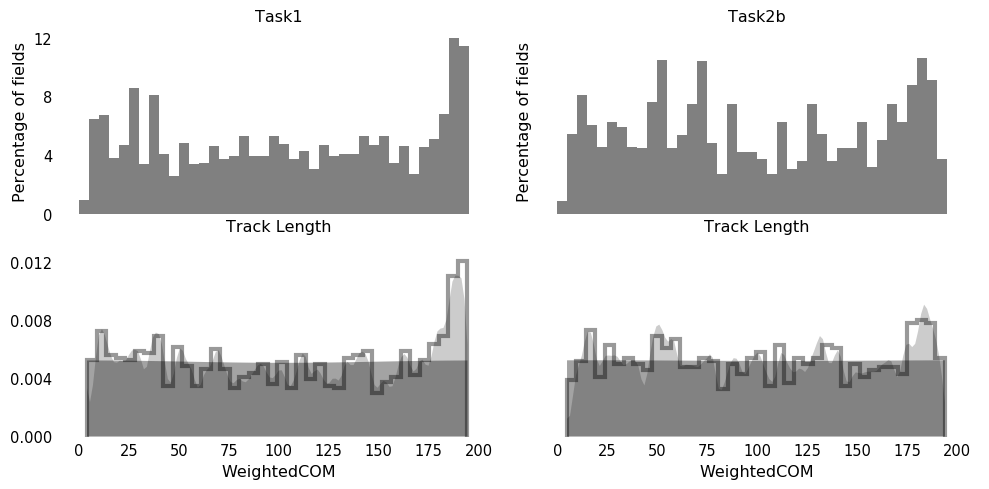

In [8]:
h, c = x.plot_histogram_of_com(x.pfparam_combined, 
                         tasks_to_plot=['Task1', 'Task2b'], 
                               bins=5, figsize=(10, 5))

CFC16
CFC17
CFC19
CFC4
NR14
NR21
NR23
NR24
NR6
Task1: T-test : p-value 0.0134
Task2b: T-test : p-value 0.6597


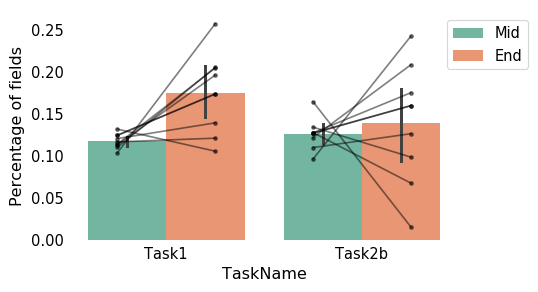

In [9]:
d, d1, c = x.calculate_ratiofiring_atrewzone(x.pfparam_combined,
                                      tasks_to_compare=['Task1', 'Task2b'],
                                      ranges=np.arange(25, 225, 25))

## Histogram of COM - Control Animals

In [277]:
CombinedFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ControlAnimals/PlaceCellResults_All/'
ParentDataFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ControlAnimals/'
donotuse = []
task_dict = {'Task1':'1 Fam Rew', 'Task1b':'2 Fam Rew'}

In [279]:
y = cp(CombinedFolder, ParentDataFolder, task_dict, norewardtask=['Task2'], donotuseanimal=[], controlflag=1)

CFC19_placecellparams_df.csv
CFC17_placecellparams_df.csv
CFC4_placecellparams_df.csv
CFC3_placecellparams_df.csv


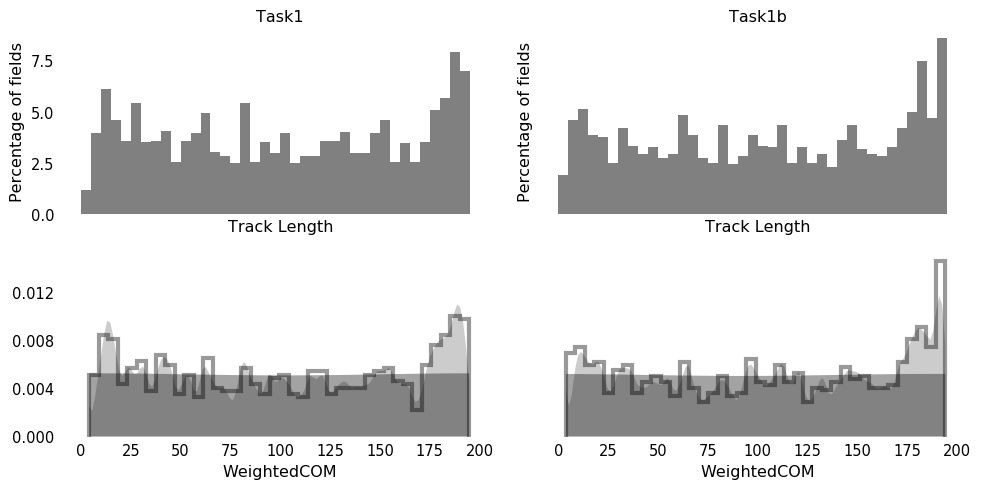

In [281]:
h, c = y.plot_histogram_of_com(y.pfparam_combined, 
                         tasks_to_plot=['Task1', 'Task1b'], 
                               bins=5, figsize=(10, 5))

CFC17
CFC19
CFC3
CFC4
Task1: T-test : p-value 0.1338
Task1b: T-test : p-value 0.0179


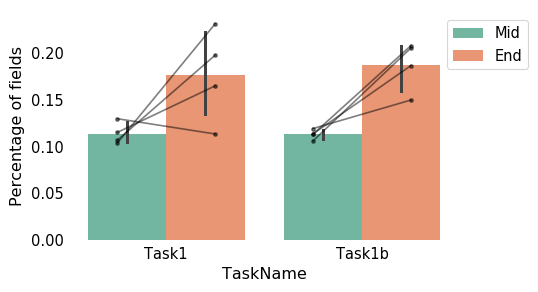

In [283]:
d, d1, c = y.calculate_ratiofiring_atrewzone(y.pfparam_combined,
                                      tasks_to_compare=['Task1', 'Task1b'],
                                      ranges=np.arange(25, 225, 25))

## Find Reward Cells

In [328]:
CombinedFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ExpAnimals/PlaceCellResults_All/'
ParentDataFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ExpAnimals/'
donotuse = []
task_dict = {'Task1':'1 Fam Rew', 'Task2':'2 No Rew', 'Task3':'3 Fam Rew', 'Task4':'4 Nov Rew'}

In [329]:
from RewardCell_Analysis import FindRewardCells as frc
f = frc(CombinedFolder, ParentDataFolder, task_dict, norewardtask=['Task2'], donotuseanimal=[])

NR21_rewardcellparams_df.csv
NR23_rewardcellparams_df.csv
CFC19_rewardcellparams_df.csv
NR6_rewardcellparams_df.csv
CFC16_rewardcellparams_df.csv
NR14_rewardcellparams_df.csv
NR24_rewardcellparams_df.csv
CFC4_rewardcellparams_df.csv
CFC17_rewardcellparams_df.csv
NR6_placecellparams_df.csv
NR21_placecellparams_df.csv
NR14_placecellparams_df.csv
CFC19_placecellparams_df.csv
CFC17_placecellparams_df.csv
CFC4_placecellparams_df.csv
NR24_placecellparams_df.csv
NR23_placecellparams_df.csv
CFC16_placecellparams_df.csv


Percentage of reward cells 1.40
(20, 60) (20,)


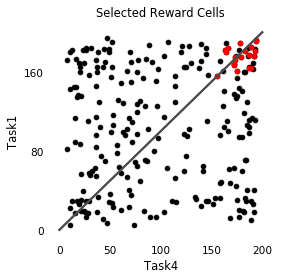

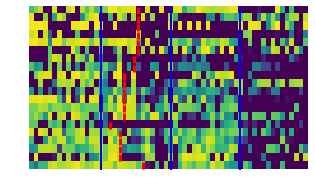

In [330]:
reward_df = f.find_plot_common_end_ofzone_cells(taskA='Task1', taskB='Task4', difference=5) #5 = 25cm
f.plot_binmean_of_rewardcells(reward_data=reward_df)
c1 = f.get_data_for_correlation(reward_df)
m1 = f.get_mean_correlation_withtaskA(reward_df)

(60, 60) (60,)


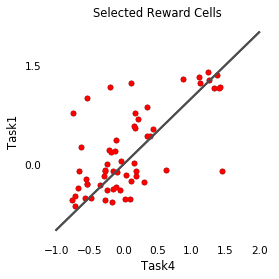

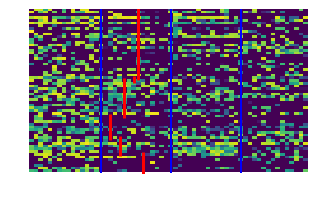

In [331]:
reward_df_endzone = f.find_rewardcells_atrewardzone(taskA='Task1', taskB='Task4', difference=15)
f.plot_binmean_of_rewardcells(reward_data=reward_df_endzone, endzoneflag=1)
c2 = f.get_data_for_correlation(reward_data=reward_df_endzone, endzoneflag=1)
m2 = f.get_mean_correlation_withtaskA(reward_data=reward_df_endzone, endzoneflag=1)

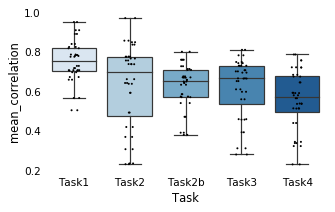

In [337]:
f.plot_mean_correlation_with_taskA(m1, m2)

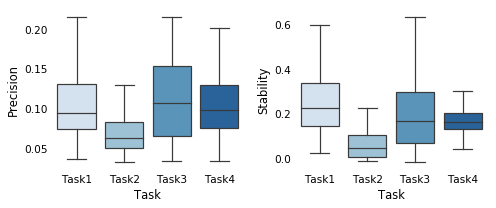

In [336]:
d = f.plot_stability_precision_of_reward_cells(pd.concat((reward_df, reward_df_endzone), ignore_index=True))